# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [1]:
# Minha dupla trancou a matéria e por isso o professor liberou que eu fizesse os trabalhos sozinho
print('Gabriel Borges Gutierrez' + ' 237300')

Gabriel Borges Gutierrez 237300


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems.

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 42,000 training examples, and 28,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## ------ Read Dataset ----- ##
df = pd.read_csv('digit_recognizer_train.csv')
df = df.sample(frac=1)
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
57011,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48033,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28360,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13731,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19954,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


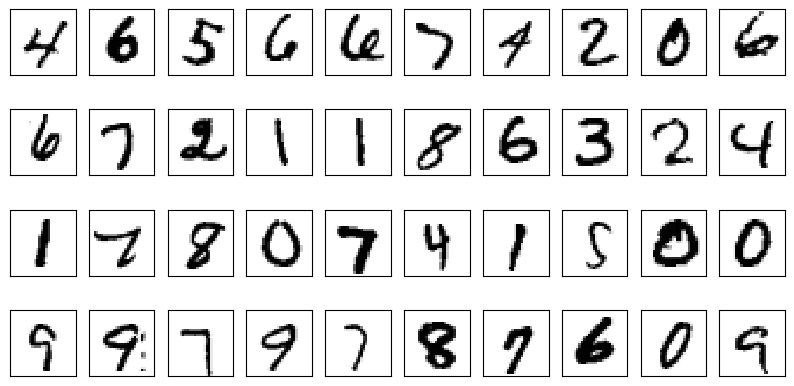

In [3]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

In [4]:
from sklearn.preprocessing import normalize

X = df.drop('label', axis='columns')
y = df['label']

X = normalize(X)

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

In [5]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


In [6]:
# TODO: Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1234)

pcaReducted = pca.fit_transform(X)


reduced_df = pd.DataFrame(pcaReducted)

reduced_df["label"] = y

reduced_df

,0,1,label
0,-0.260630,-0.262031,5
1,-0.065222,0.111276,0
2,-0.050616,0.175300,4
3,-0.326704,0.125006,1
4,-0.363570,0.014908,9
...,...,...,...
59995,-0.004286,-0.457463,8
59996,0.047304,0.203128,3
59997,-0.181969,-0.339447,5
59998,0.195227,0.190538,6


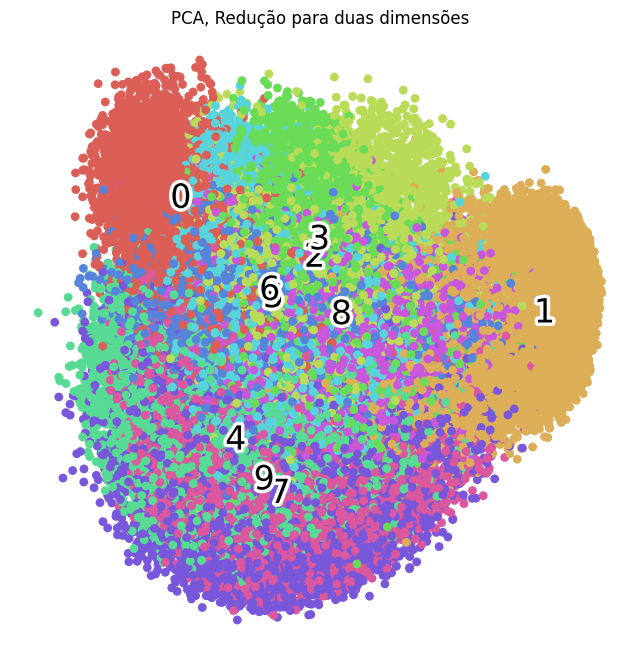

In [7]:
scatter(pcaReducted, y)
plt.title('PCA, Redução para duas dimensões')
plt.show()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

In [8]:
# TODO: T-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1, random_state=1234)

reducted = tsne.fit_transform(X)

reduced_df = pd.DataFrame(reducted)

reduced_df["label"] = y

reduced_df

,0,1,label
0,-38.480713,-26.428061,5
1,-86.084610,1.329916,0
2,-38.946575,13.723457,4
3,-75.148689,9.274137,1
4,-76.887024,33.658768,9
...,...,...,...
59995,28.492266,-67.185249,8
59996,17.336969,57.690289,3
59997,37.096989,-79.077347,5
59998,59.933800,49.121361,6


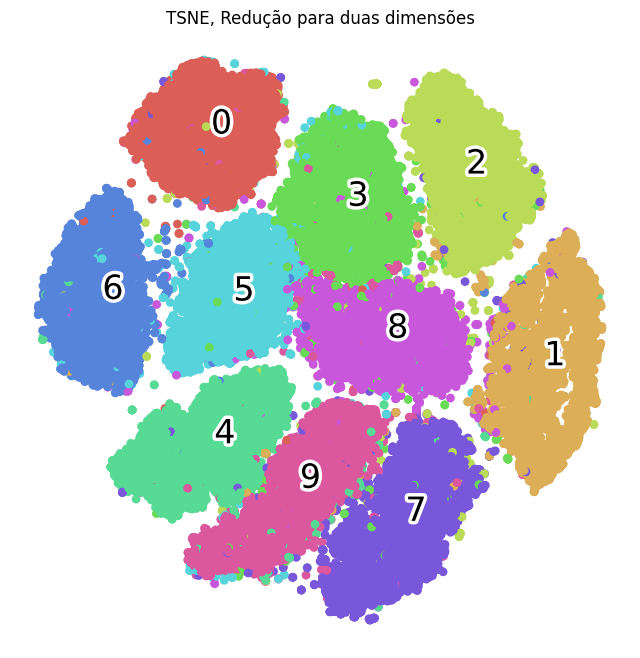

In [9]:
scatter(reducted, y)
plt.title('TSNE, Redução para duas dimensões')
plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

In [10]:
# TODO: PCA + t-SNE

pca = PCA(n_components=30, random_state=1234)

reductedPCA = pca.fit_transform(X)

tsne = TSNE(n_components=2, n_jobs=-1, random_state=1234)

bestRreducted = tsne.fit_transform(reductedPCA)

reduced_df = pd.DataFrame(bestRreducted)

reduced_df["label"] = y

reduced_df

,0,1,label
0,-45.544624,-88.672592,5
1,-67.248917,18.959419,0
2,-19.261654,15.202939,4
3,-76.237526,-2.033978,1
4,-91.937729,-2.934768,9
...,...,...,...
59995,24.617086,-73.978653,8
59996,30.561956,68.757858,3
59997,31.775991,-81.106354,5
59998,56.715816,33.483986,6


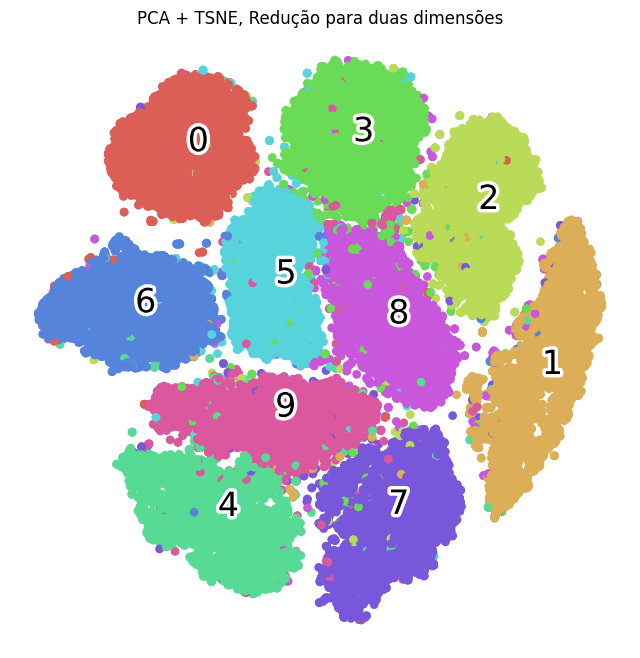

In [11]:
scatter(bestRreducted, y)
plt.title('PCA + TSNE, Redução para duas dimensões')
plt.show()

(0.25 point) Plot a 3D graph using the best representation founded.

In [12]:
# TODO: 3D Graph

tsne = TSNE(n_components=3, n_jobs=-1, random_state=1234)

reducted = tsne.fit_transform(X)

reduced_df = pd.DataFrame(reducted)

reduced_df["label"] = y

reduced_df

,0,1,2,label
0,-15.147909,-15.155230,-14.090971,5
1,-11.974974,2.939572,-16.610609,0
2,-7.909367,7.686408,-1.925567,4
3,-20.111816,8.118216,-21.971991,1
4,-26.868700,5.629996,-13.788153,9
...,...,...,...,...
59995,7.896111,-24.442060,4.796897,8
59996,7.409217,17.160671,17.446198,3
59997,11.387310,-31.706455,7.654667,5
59998,19.749205,19.720091,-6.543712,6


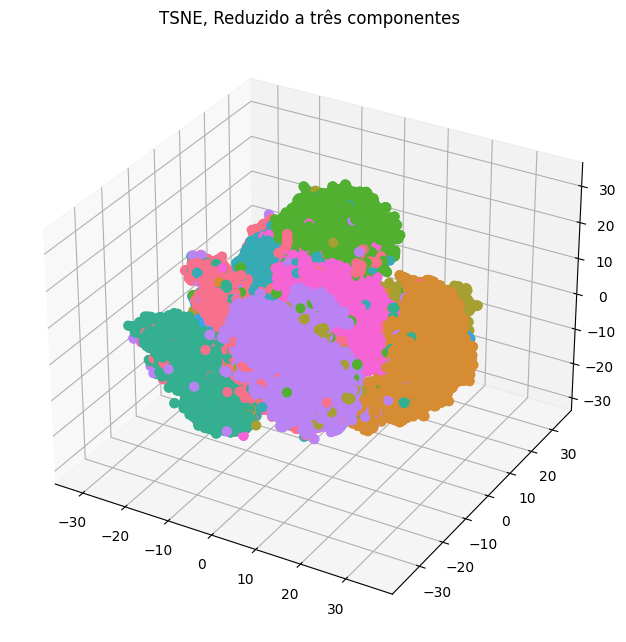

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)

fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(reduced_df[0], reduced_df[1], reduced_df[2], s=40, c=y, marker='o', cmap=cmap, alpha=1)
plt.title('TSNE, Reduzido a três componentes')
plt.show ()


**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

**Answers:**

- What is the best representation, and why? -> Best representation was given by t-SNE. Since it is a non-linear algorithm it can capture similarities better than a linear algorithm.
- Do the combination of techniques help improve the results? -> The combination of techniques can improve execution time, but here the dataset didn't have enough dimensions to make a big difference, here it was observed a 14 seconds difference between using only t-SNE and t-SNE and PCA combined.
- Did adding another dimension help enhance the performance? -> No, because of how t-SNE works the bigger the target dimension number is more expensive the computation will be.
- How can we use this knowledge to decide which model to train? -> If you need to try multiple dimension numbers it's better to start from a small N number to bigger N number, and it's preferable to go for lower N numbers.

(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [14]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.show()

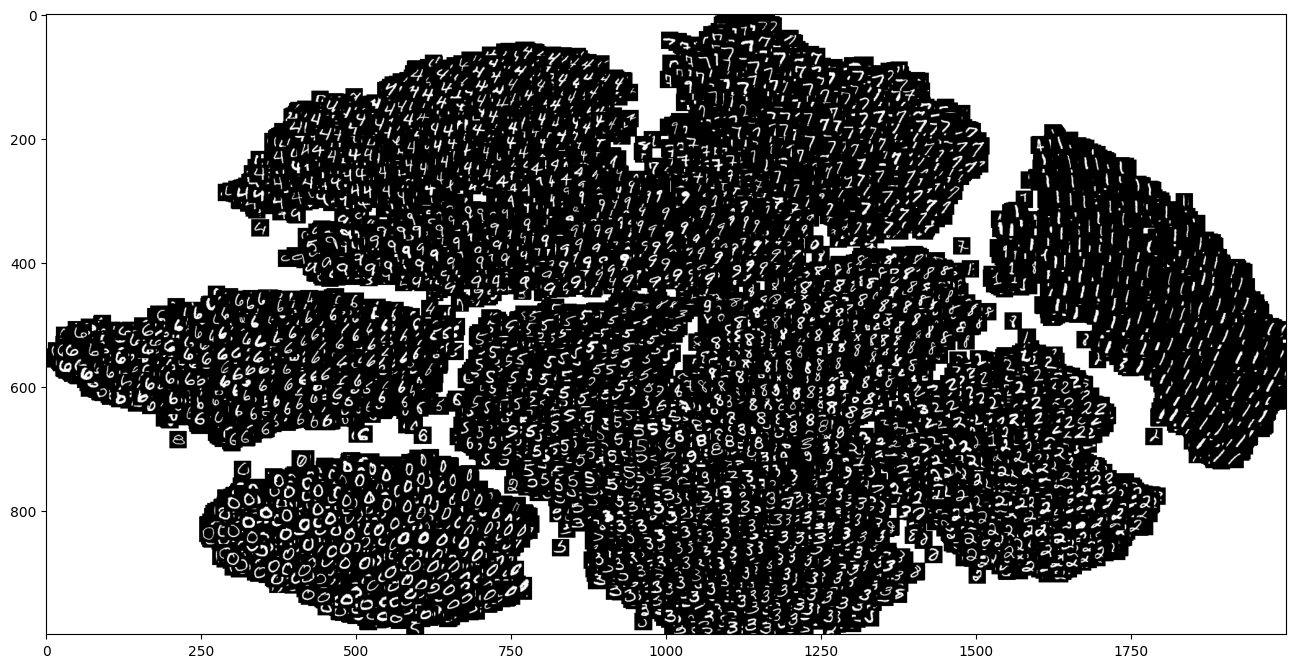

In [15]:
## Plot the original images using two arrays: 
#    best_embedding with the components (n_components=2) from either PCA or t-SNE;
#    images with the original data. Both arrays should correspond to the same data.

plot_images(bestRreducted, df.drop('label', axis='columns').values)

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [16]:
# Uniform Manifold Approximation and Projection (UMAP)

from umap import UMAP

reducer = UMAP(random_state=1234)
reducer.fit(X)

embedding = reducer.transform(X)

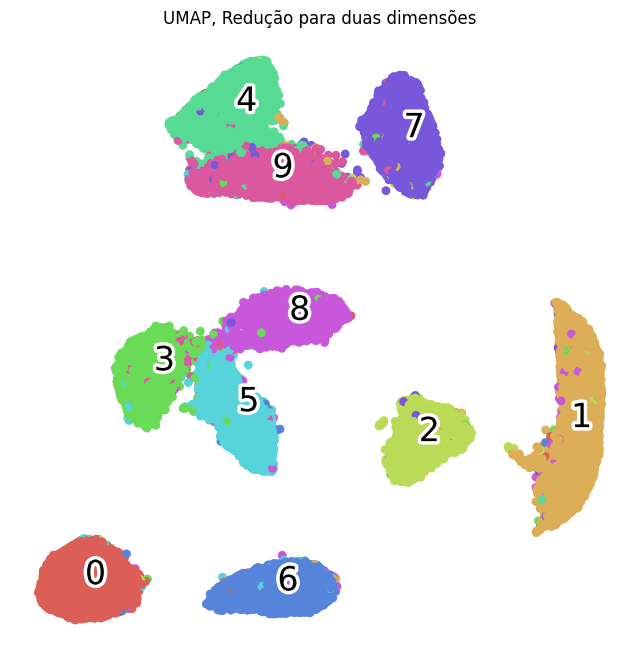

In [17]:
scatter(embedding, y)
plt.title('UMAP, Redução para duas dimensões')
plt.show()

(0.25 point) Train a k_means algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the k_means algorithm.*

In [18]:
def scatterCluster(x, y, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[y == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


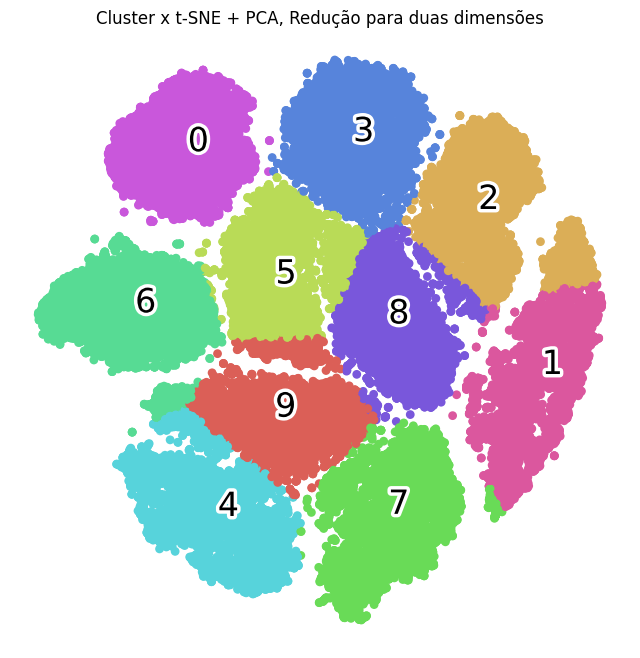

In [19]:
# TODO: KMeans with a dimension reduction technique.
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10)

Z = k_means.fit_predict(bestRreducted)

scatterCluster(bestRreducted, y, Z)
plt.title('Cluster x t-SNE + PCA, Redução para duas dimensões')
plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

Text(0.5, 1.0, 'Elbow curve')

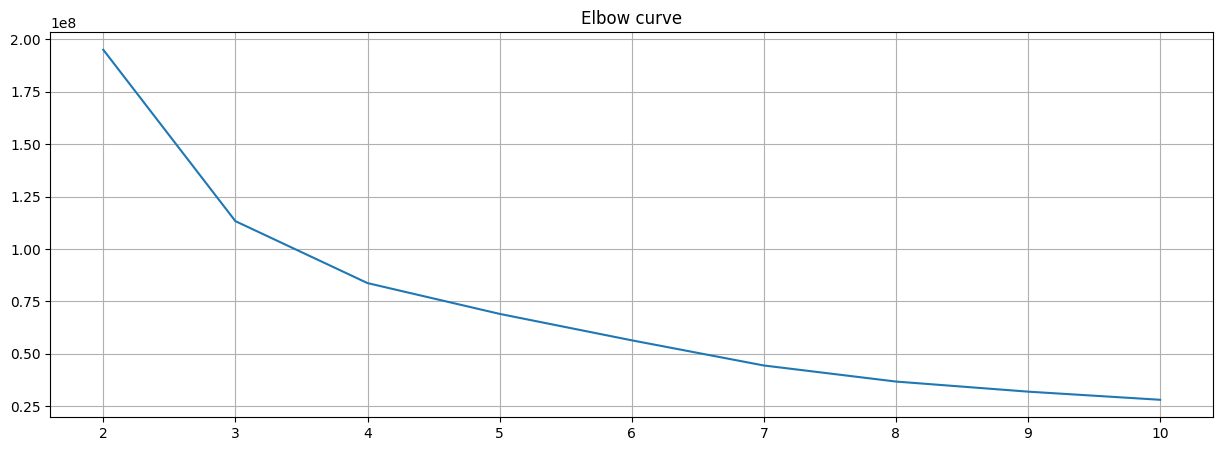

In [20]:
# TODO: Elbow Method and 2D plot
from matplotlib.ticker import MaxNLocator

distorsions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bestRreducted)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5)).gca()
plt.plot(range(2, 11), distorsions)
plt.grid(True)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Elbow curve')

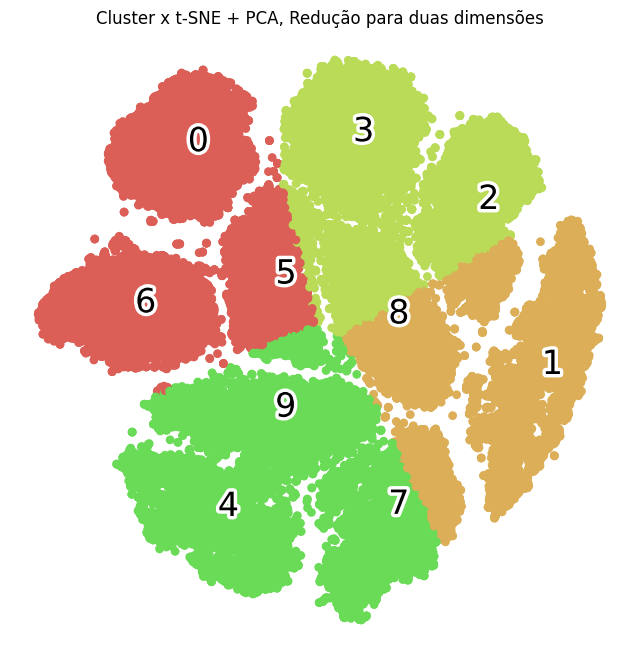

In [21]:
k_means = KMeans(n_clusters=4)

Z = k_means.fit_predict(bestRreducted)

scatterCluster(bestRreducted, y, Z)
plt.title('Cluster x t-SNE + PCA, Redução para duas dimensões')
plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

For n_clusters = 2 The average silhouette_score is : 0.06115575280507555
For n_clusters = 3 The average silhouette_score is : 0.07078505988047058
For n_clusters = 4 The average silhouette_score is : 0.07134756980590805
For n_clusters = 5 The average silhouette_score is : 0.07668999088762442
For n_clusters = 6 The average silhouette_score is : 0.08029888216701095
For n_clusters = 7 The average silhouette_score is : 0.08279582815626463
For n_clusters = 8 The average silhouette_score is : 0.08321041282617458
For n_clusters = 9 The average silhouette_score is : 0.08674314037848649
For n_clusters = 10 The average silhouette_score is : 0.08718847242481034


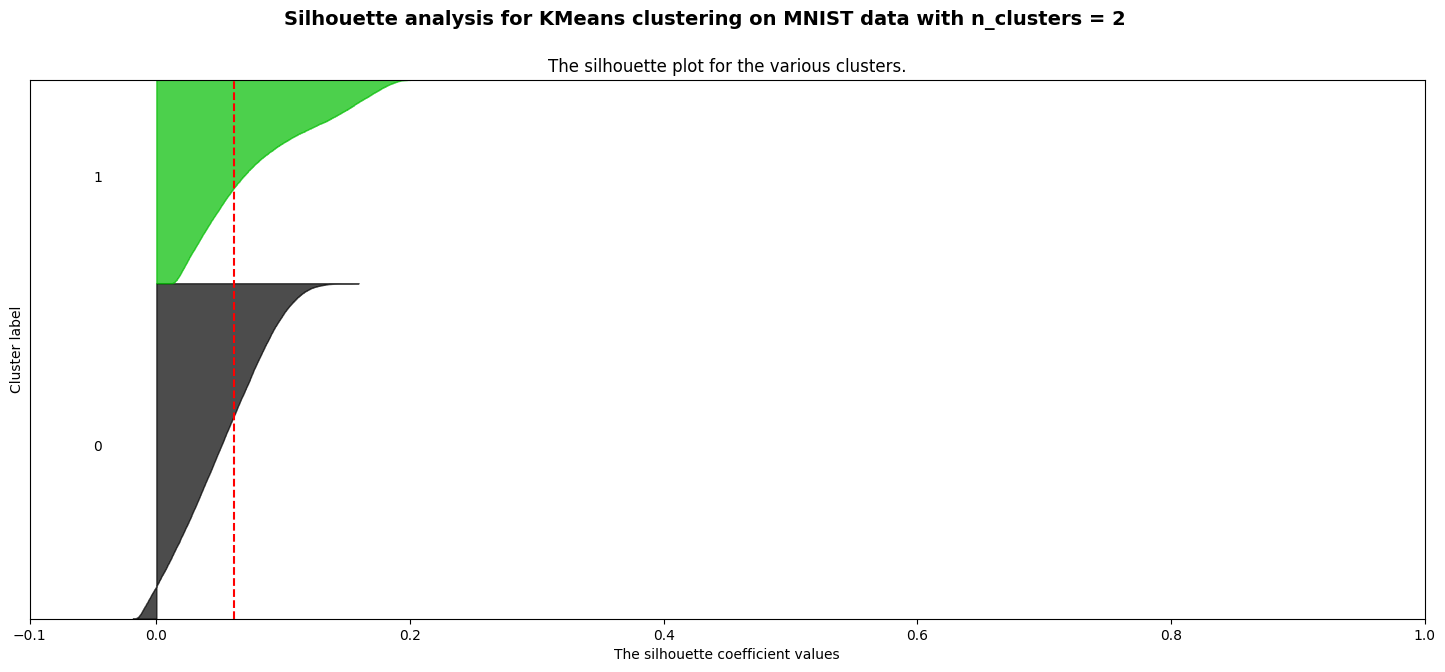

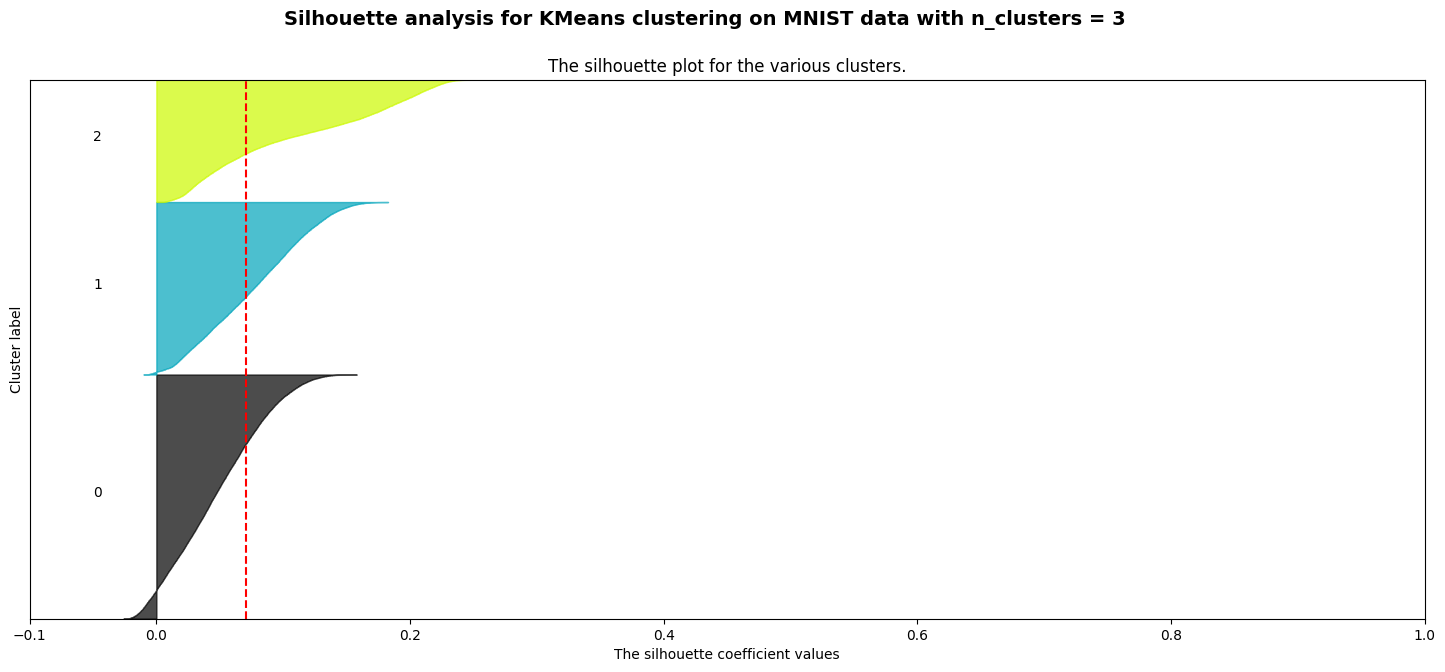

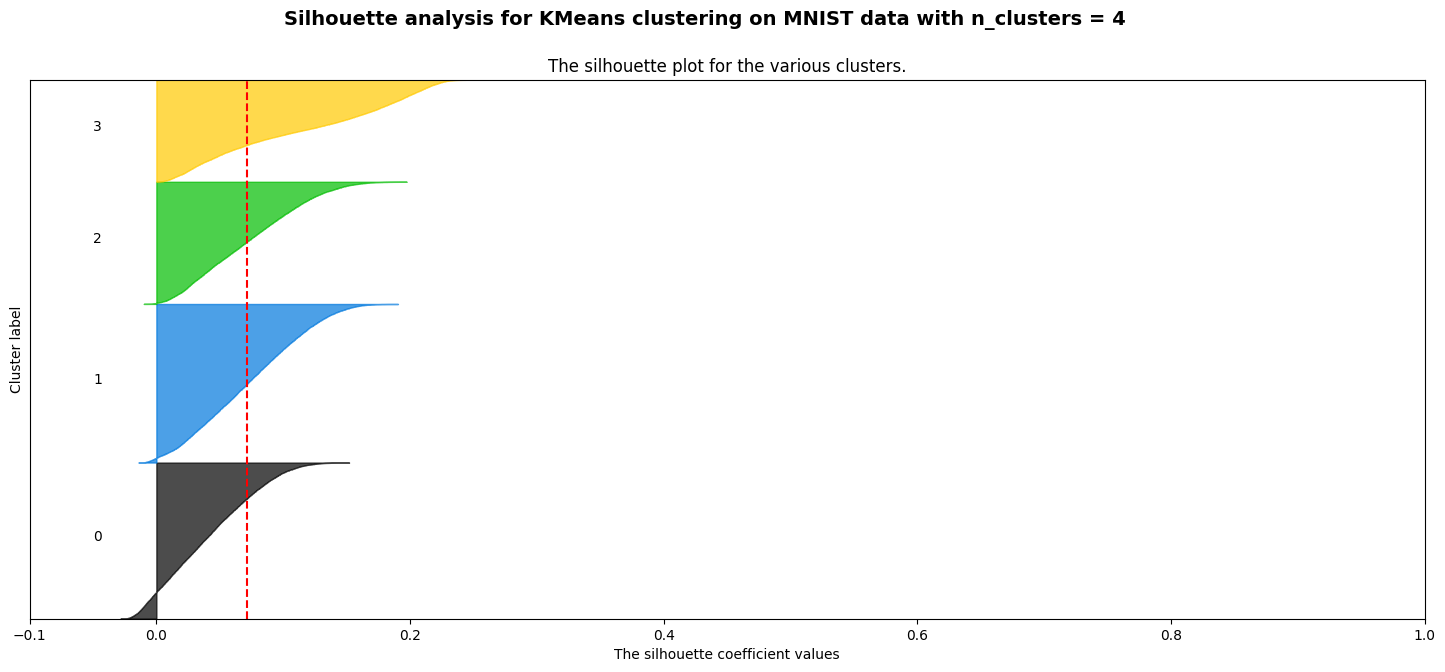

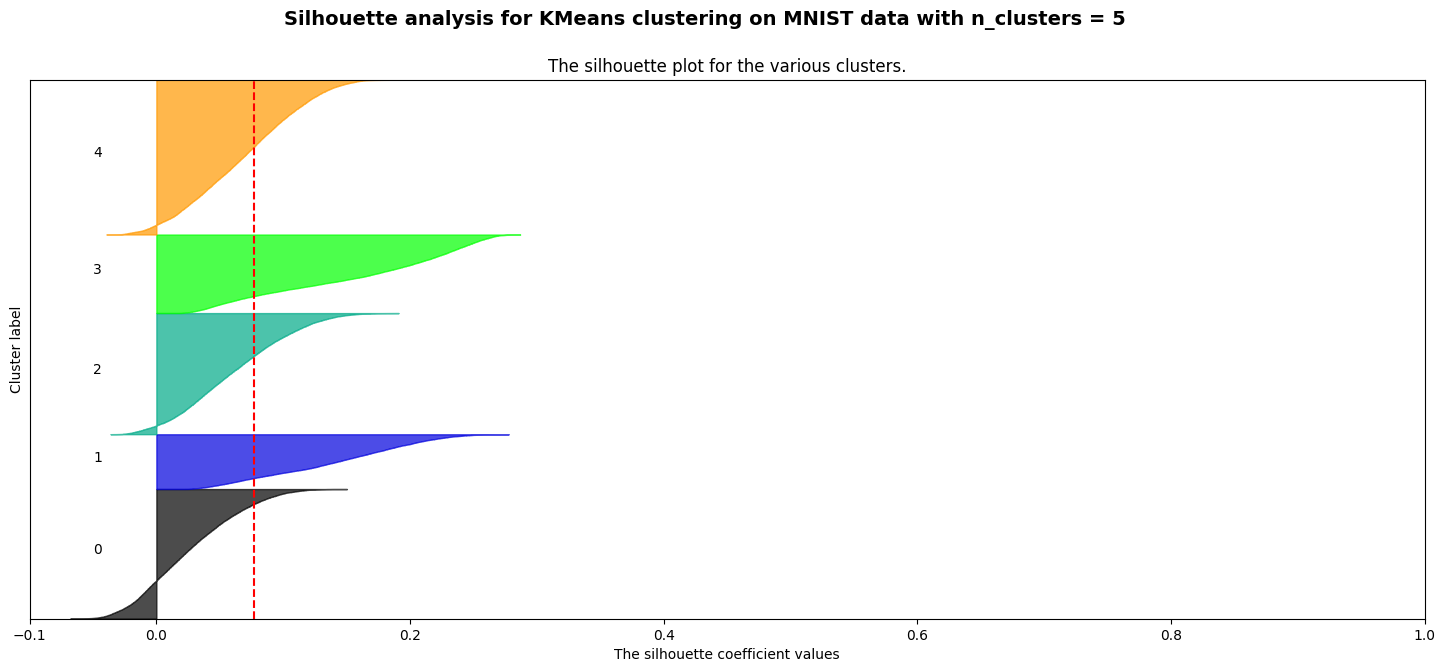

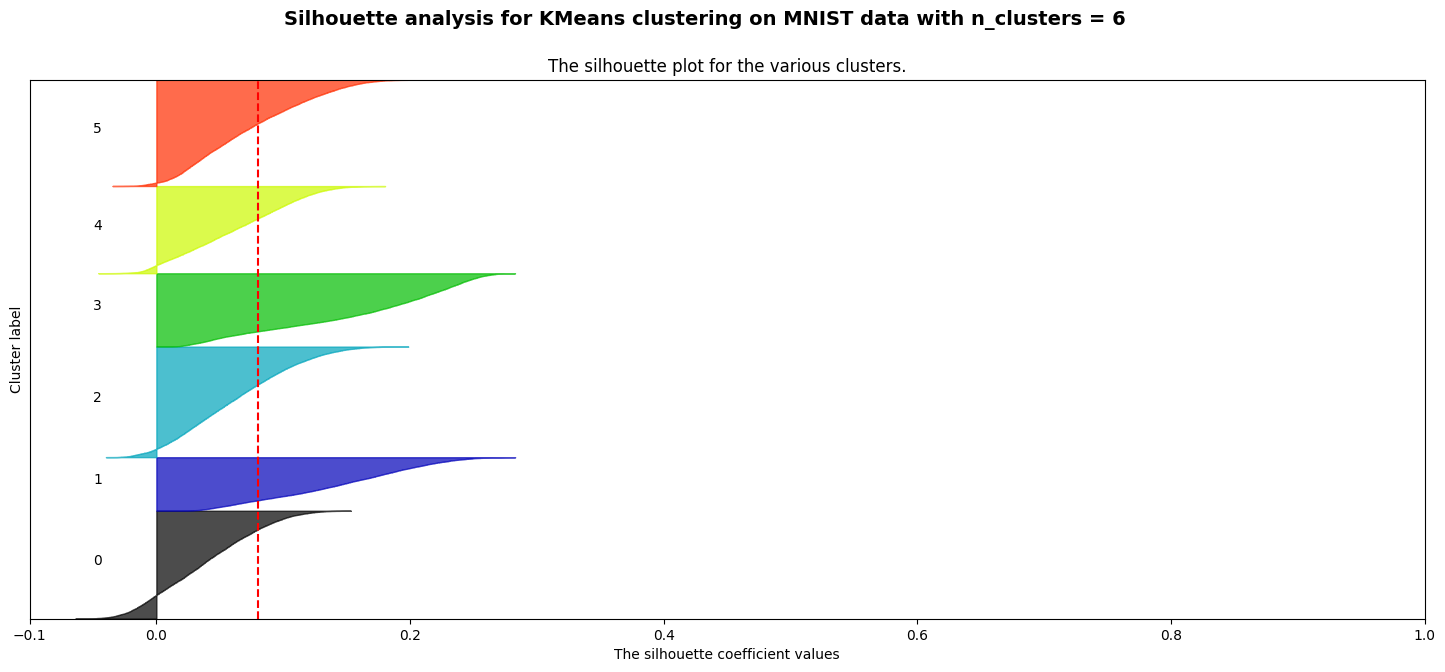

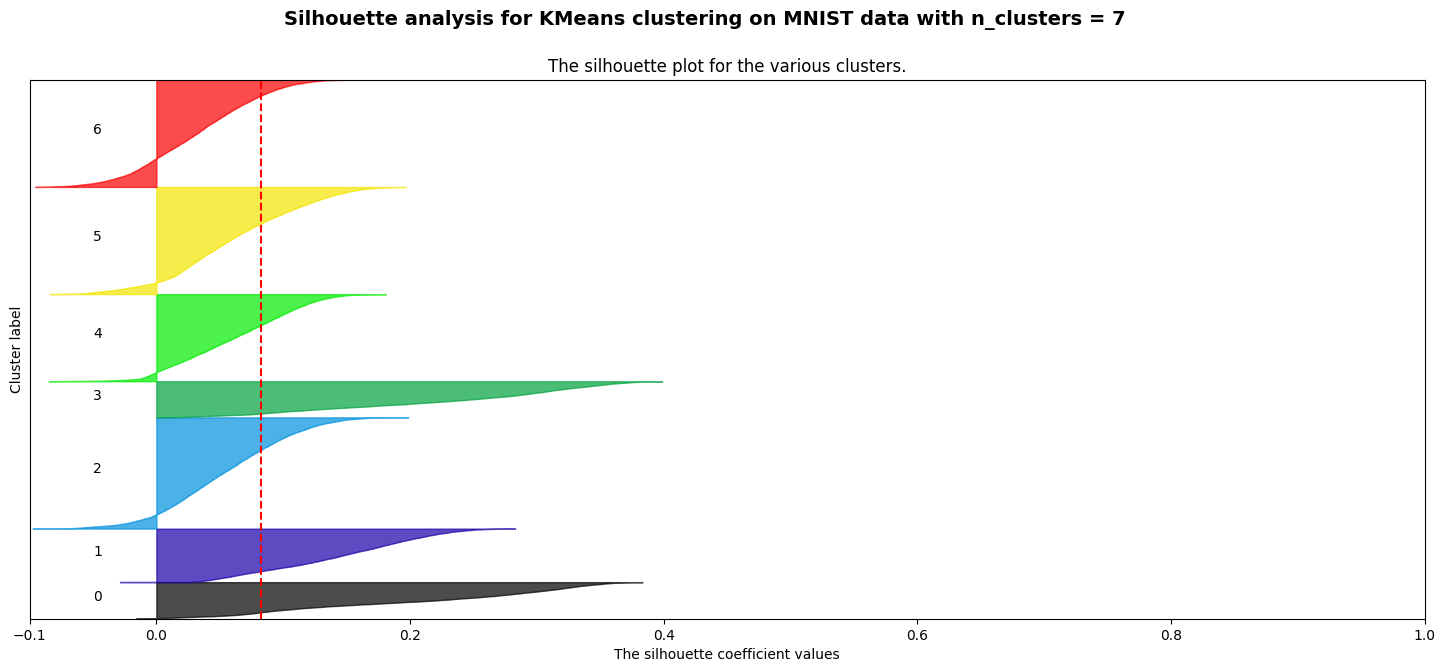

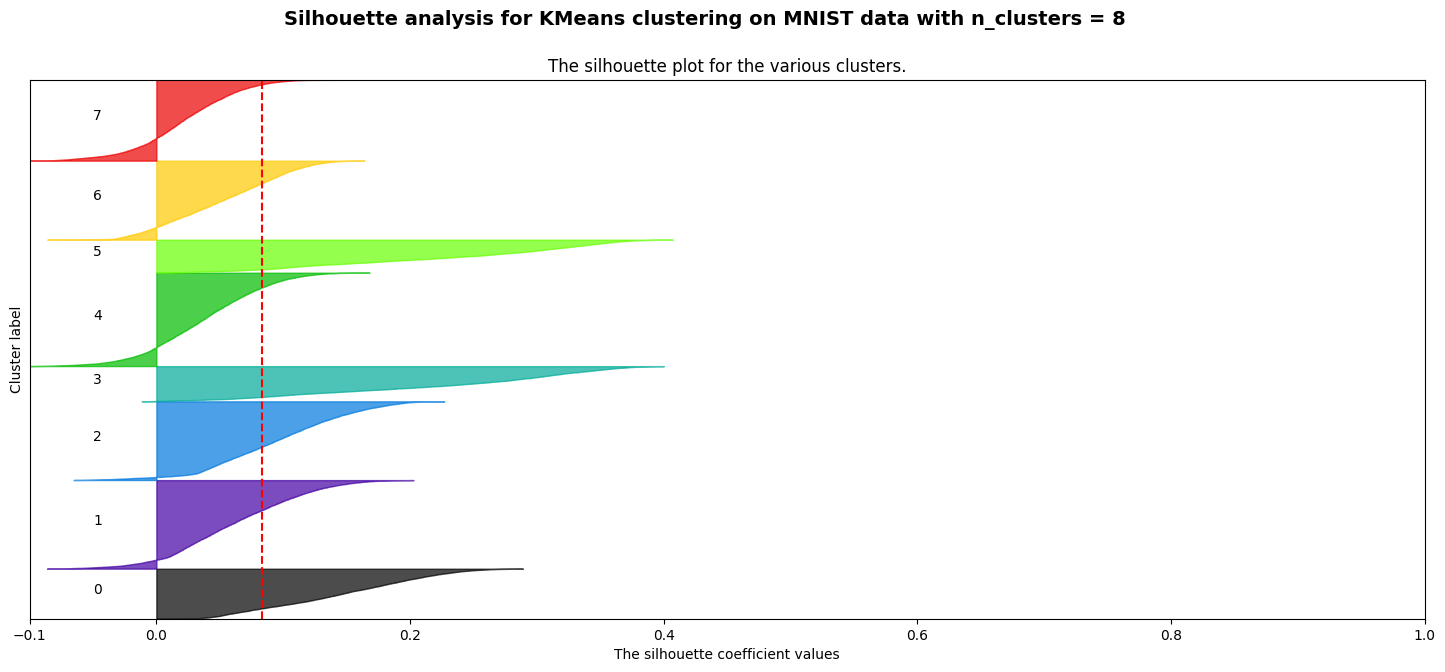

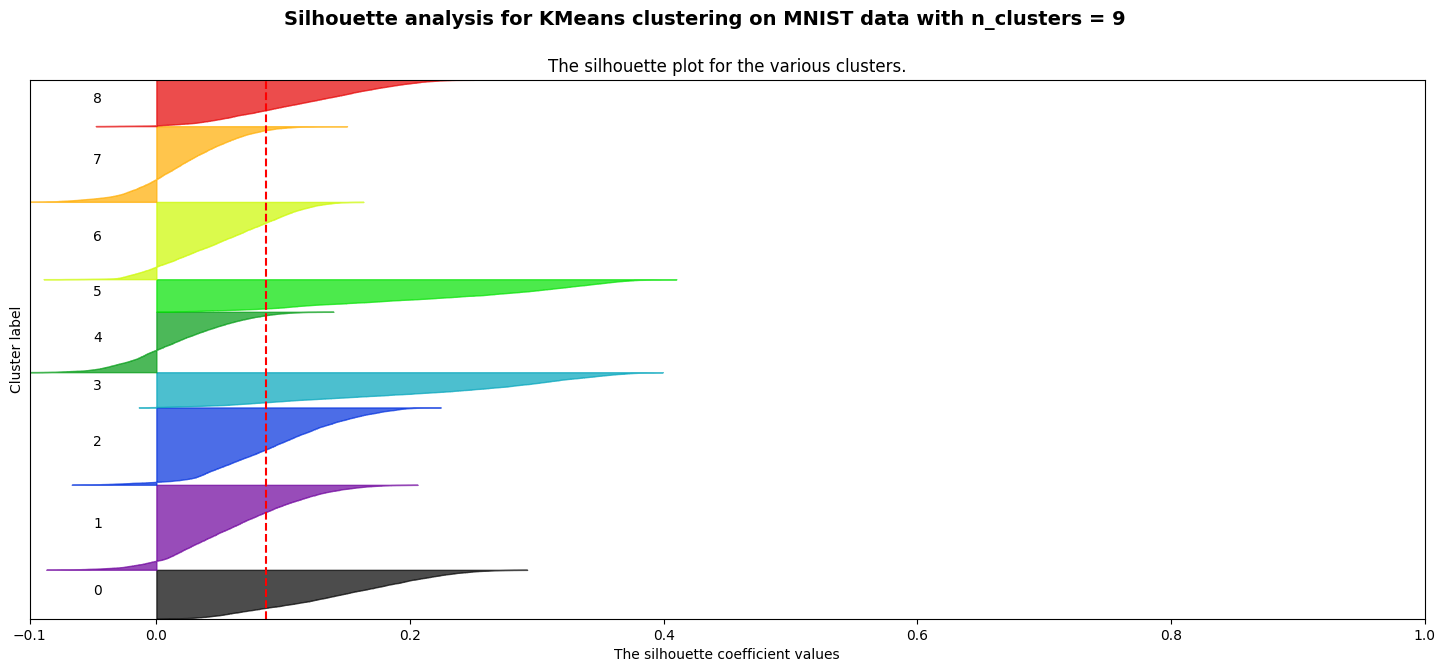

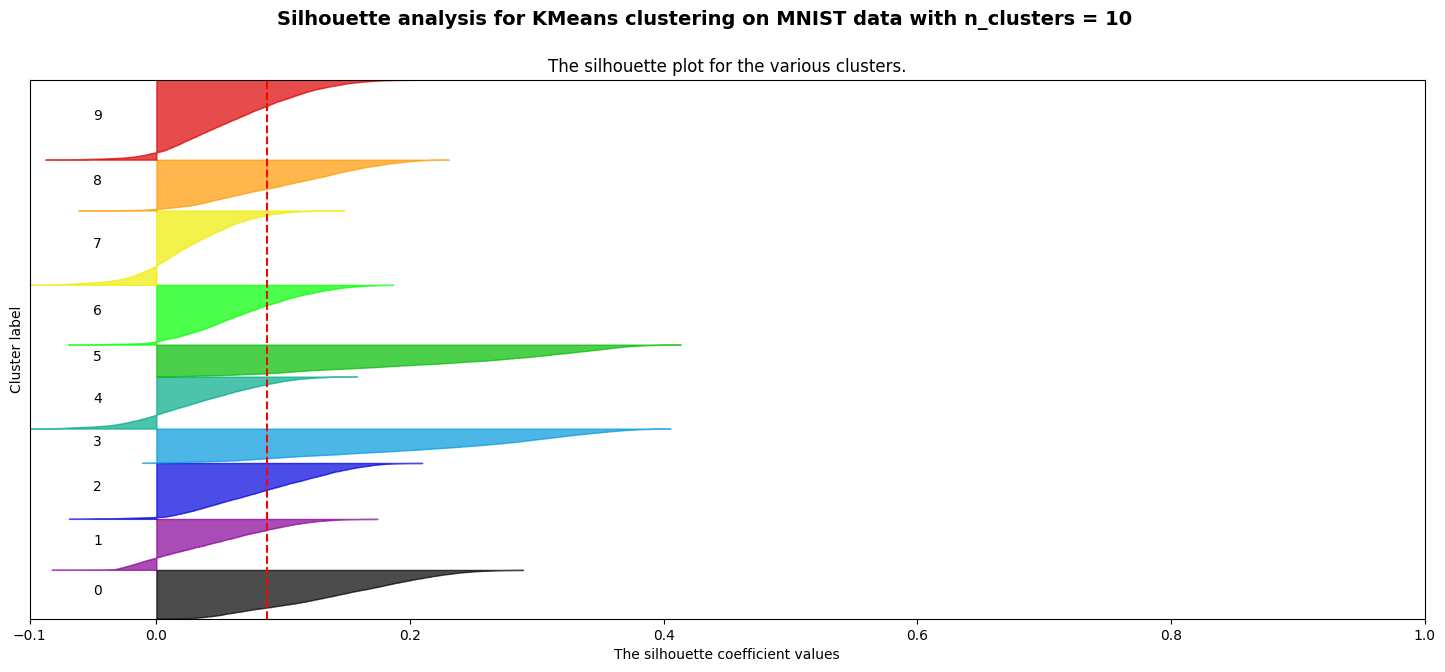

In [22]:
# TODO: Silhouette Method -- Average Score and plot
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=1234)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on MNIST data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

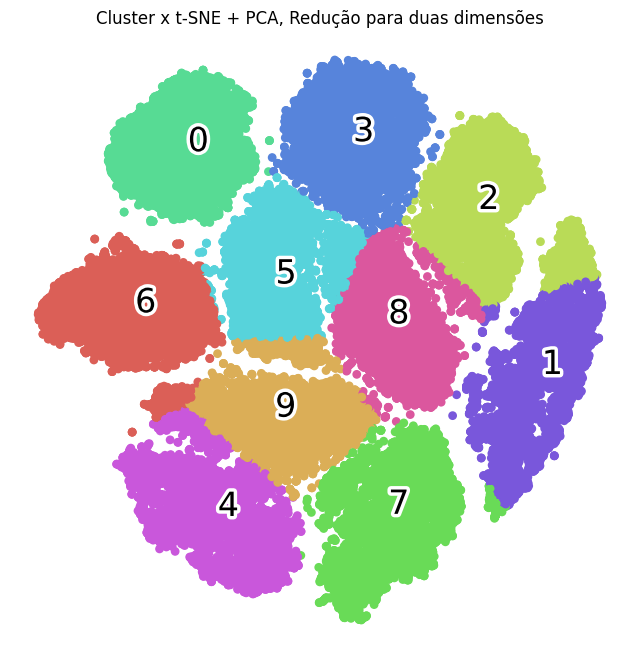

In [23]:
k_means = KMeans(n_clusters=10)

Z = k_means.fit_predict(bestRreducted)

scatterCluster(bestRreducted, y, Z)
plt.title('Cluster x t-SNE + PCA, Redução para duas dimensões')
plt.show()

(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of k_means and the original data distribution.

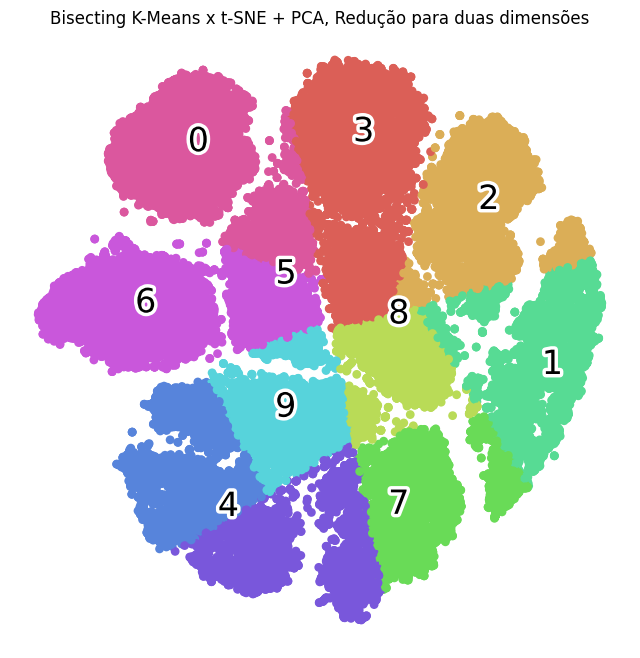

In [24]:
# TODO: Unsupervised Algorithm of your choose

from sklearn.cluster import BisectingKMeans

bkm = BisectingKMeans(n_clusters=10, random_state=1234)

Z = bkm.fit_predict(bestRreducted)

scatterCluster(bestRreducted, y, Z)
plt.title('Bisecting K-Means x t-SNE + PCA, Redução para duas dimensões')
plt.show()

**(2 points) Questions:**

- Did k_means provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did k_means perform better? How can different clustering techniques be compared?

**Answers:**

- Did k_means provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset? -> Elbow and silhouette didn't suggest the same number, but the silhouette method did suggest 10 clusters, which is the "correct" number of clusters.
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different? -> I would choose the silhouette method, since it is a bit more analytical than the elbow method. The silhouette method did suggest the same number of clusters of the real classes in the dataset.
- When compared to other algorithms, did k_means perform better? How can different clustering techniques be compared? -> KMeans did better than the Bisecting KMeans, you can compare the two by looking at the clusters in the graph.

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [25]:
# TODO: Baseline Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X, y, test_size=0.25, random_state=1234)

loRNoPCA = LogisticRegression(max_iter=2000, random_state=1234)
loRNoPCA.fit(X_train, Y_train)
Y_pred = loRNoPCA.predict(X_val)

accuracyScore = accuracy_score(Y_val, Y_pred)
f1Score = f1_score(Y_val, Y_pred, average='weighted')
(accuracyScore, f1Score)

(0.9182666666666667, 0.918072958804131)

(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

In [26]:
# TODO: Baseline Model with PCA

results = pd.DataFrame({"dimentions": [], "accuracy": [], "f1": []})

for i in range(1,100):

    pca = PCA(n_components=i, random_state=1234)
    pca.fit(X_train)

    X_train_reduced = pca.transform(X_train)
    X_val_reduced = pca.transform(X_val)

    loR = LogisticRegression(max_iter=1500, random_state=1234)
    loR.fit(X_train_reduced, Y_train)
    Y_pred = loR.predict(X_val_reduced)

    accuracyScore = accuracy_score(Y_val, Y_pred)
    f1Score = f1_score(Y_val, Y_pred, average='weighted')
    results = results.append({"dimentions": i, "accuracy": accuracyScore, "f1": f1Score}, ignore_index=True)
    
accuracyScore

results

,dimentions,accuracy,f1
0,1.0,0.291867,0.230488
1,2.0,0.438800,0.381987
2,3.0,0.499467,0.482916
3,4.0,0.583867,0.574499
4,5.0,0.685933,0.681430
...,...,...,...
94,95.0,0.913800,0.913585
95,96.0,0.913467,0.913252
96,97.0,0.914133,0.913924
97,98.0,0.914067,0.913855


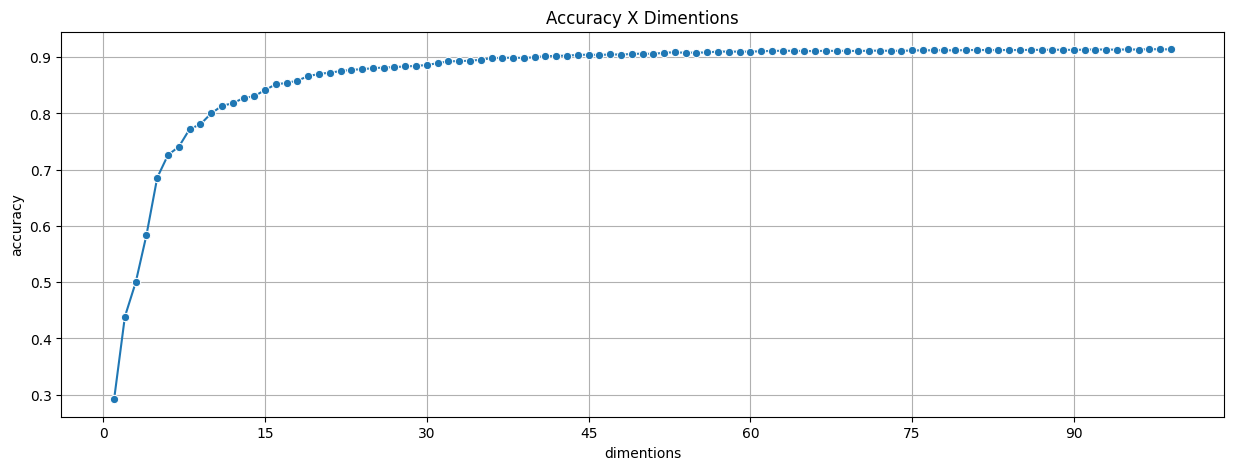

In [27]:
fig = plt.figure(figsize=(15, 5)).gca()
sns.lineplot(data=results, x='dimentions', y="accuracy", marker="o")
plt.grid(True)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Accuracy X Dimentions')
plt.show()

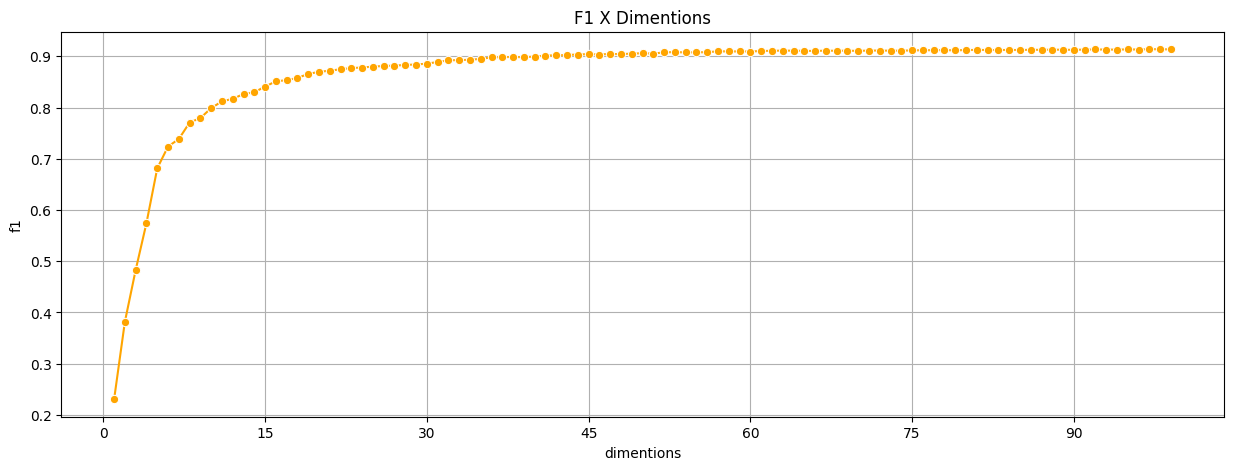

In [28]:
fig = plt.figure(figsize=(15, 5)).gca()
sns.lineplot(data=results, x='dimentions', y="f1", marker="o", color='orange')
plt.grid(True)
fig.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('F1 X Dimentions')
plt.show()

(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [29]:
# TODO: Evaluate models in Test split

dfTest = pd.read_csv('digit_recognizer_test.csv')

x_test = dfTest.drop('label', axis='columns')
y_test = dfTest['label']

x_test = normalize(x_test)

Y_predNoPCA = loRNoPCA.predict(x_test)

accuracyScore = accuracy_score(y_test, Y_predNoPCA)
f1Score = f1_score(y_test, Y_predNoPCA, average='weighted')
(accuracyScore, f1Score)

(0.9214, 0.9211906119081815)

In [30]:

pca = PCA(n_components=45, random_state=1234)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(x_test)

loR = LogisticRegression(max_iter=1500, random_state=1234)
loR.fit(X_train_reduced, Y_train)
Y_pred = loR.predict(X_test_reduced)

accuracyScore = accuracy_score(y_test, Y_pred)
f1Score = f1_score(y_test, Y_pred, average='weighted')
(accuracyScore, f1Score)

(0.907, 0.9066981594922229)

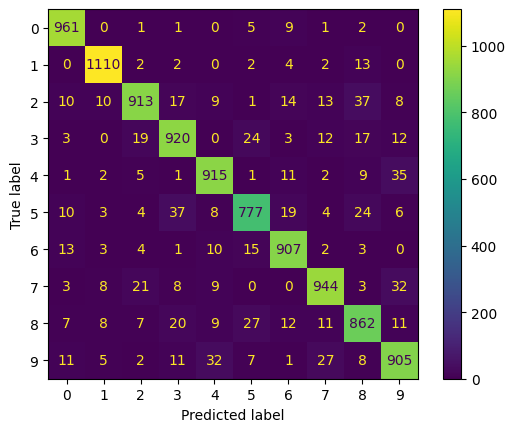

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, Y_predNoPCA, labels=loRNoPCA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loRNoPCA.classes_)
disp.plot()
plt.show()

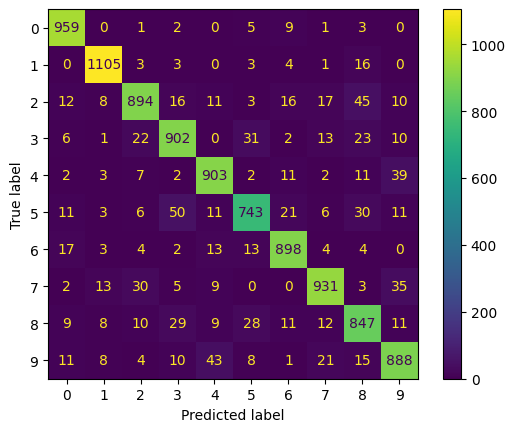

In [32]:
cm = confusion_matrix(y_test, Y_pred, labels=loR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loR.classes_)
disp.plot()
plt.show()

**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


**Answers:**

- Which model was used? What was the best result achieved without using PCA? -> The best result was 92% accuracy with a simple logistic regression.
- What are your conclusions about the Baseline model? -> The baseline model is better than the one using dimensional reduction, but it takes longer to train.
- How did you define the best model for both approaches? -> For the baseline, it was a standard logistic regression, just with more iterations so it could converge. For the PCA model it was selected comparing the results of multiple dimension numbers and selecting the one that has a good balance between less dimensions and better performance.
- Did the accuracy improve when using the PCA model? -> Yes, it was basically as good as the non PCA one.
- What are the advantages and disadvantages of using PCA on this dataset? -> By the experiments done here there is a clear advantage in using PCA as a processing step in the logistic regression pipeline by getting essentially the same performance but with faster timings.

## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**